In [1]:
import uproot, collections
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
from tqdm import tqdm
import pandas as pd
import ROOT
import glob
import os

Welcome to JupyROOT 6.30/04


In [3]:
f = uproot.open('/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert30041_pl028-142_new/reco30_035000_050000/v13/linked_tracks.root')
emu_mc = f['tracks'].arrays(['nseg', #number of total films hit
                      's.ePID', #the films the hits are in 
                      's.eX',
                      's.eY',
                      's.eP', 
                      's.eZ',
                      's.eTX',
                      's.eTY',
                      's.eChi2'], library='ak')

In [59]:
# ak.num(emu_mc['s.eP'])

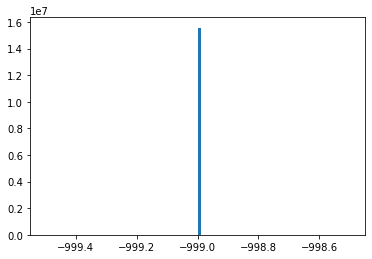

In [60]:
plt.hist(ak.flatten(emu_mc['s.eP']), bins=100)
plt.show()

In [3]:
# # Select events starting in the first 5 films
# pid_cut = 4
# nseg_cut = 10
# emu_muon_cuts = ak.where((emu_mc['s.ePID'][:, 0] <= pid_cut) & (emu_mc['nseg'] >= nseg_cut))
# selected_events = emu_mc[emu_muon_cuts]
# # # Calculate TX and TY
# TX = (selected_events['s.eX'][:, nseg_cut-1] - selected_events['s.eX'][:, 0]) / (selected_events['s.eZ'][:, nseg_cut-1] - selected_events['s.eZ'][:, 0])
# TY = (selected_events['s.eY'][:, nseg_cut-1] - selected_events['s.eY'][:, 0]) / (selected_events['s.eZ'][:, nseg_cut-1] - selected_events['s.eZ'][:, 0])
# X = selected_events['s.eX'][:, nseg_cut-1]
# Y = selected_events['s.eY'][:, nseg_cut-1]
# # # Print the calculated TX and TY
# print("TX:", TX)
# print("X:", X)


TX: [-0.00783, -0.0191, 0.0343, -0.0353, ... -0.00795, -0.00417, -0.0053, -0.00475]
X: [3.69e+04, 3.69e+04, 3.8e+04, 3.73e+04, ... 4.01e+04, 3.98e+04, 4.13e+04, 4.03e+04]


In [12]:
# ak.num(emu_mc['s.ePID'])

<Array [2, 3, 12, 7, 6, ... 40, 19, 78, 7, 2] type='1091445 * int64'>

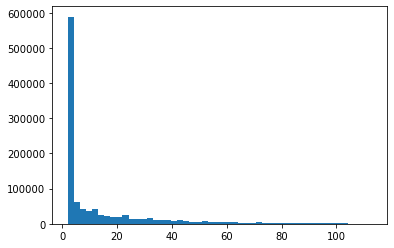

In [14]:
# plt.hist(emu_mc['nseg'], bins=50)
# plt.show()

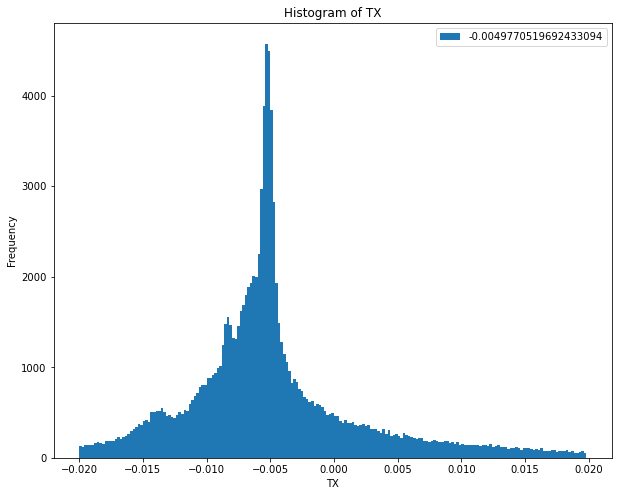

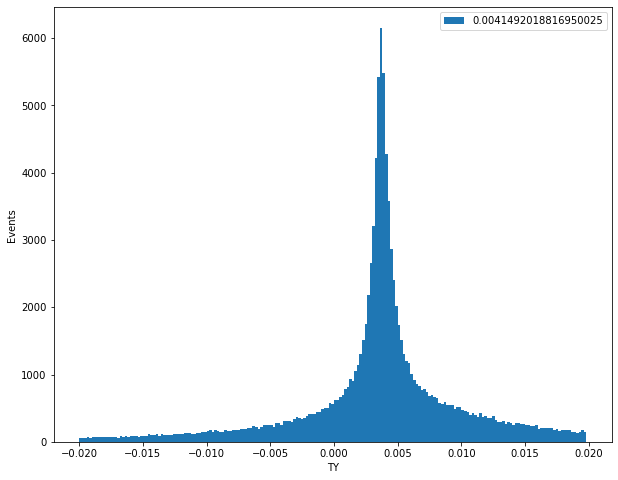

In [9]:
# plt.figure(figsize=(10, 8))

# # Define bin edges
# bin_edges = np.arange(-0.02, 0.02, 0.0002)

# # Create histogram for TX
# plt.hist(TX, bins=bin_edges, label=f'{np.mean(TX)}')
# plt.title('Histogram of TX')
# plt.xlabel('TX')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

# plt.figure(figsize=(10, 8))

# # Create histogram for TY
# plt.hist(TY, bins=bin_edges, label=f'{np.mean(TY)}')
# plt.xlabel('TY')
# plt.ylabel('Events')
# plt.legend()
# plt.show()

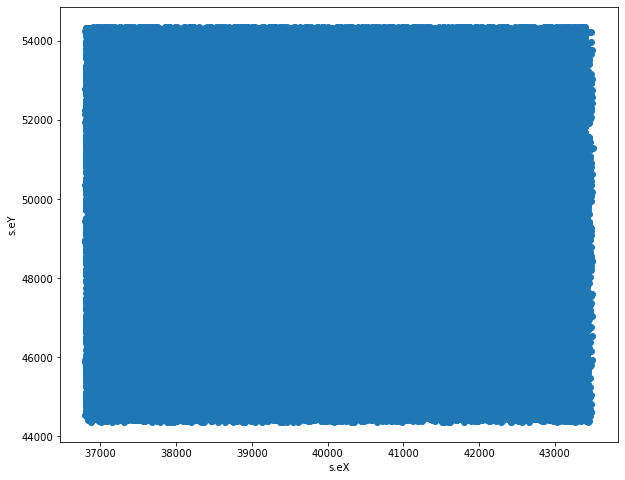

In [14]:
# plt.figure(figsize=(10, 8))
# plt.scatter(X, Y)
# plt.xlabel('s.eX')
# plt.ylabel('s.eY')
# plt.show()

In [5]:
directories = [
    '/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert30041_pl028-142_new',
    '/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert37044_pl033-147_new',
    '/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert09115_pl103-217_new',
    '/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert11191_pl178-292',
    '/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert08245_pl233-347',
]

pid_cut = 4
nseg_cut = 10

TX_values = {}  # Dictionary to store TX values for each file
TY_values = {}  # Dictionary to store TY values for each file
X_values = {}
Y_values = {}
Z_values = {}

for directory in directories:
    file_path = f"{directory}/**/linked_tracks.root"
    root_files = glob.glob(file_path, recursive=True)
    print("reading: ", root_files)
    if len(root_files) == 0:
        print(f"No ROOT file found in directory: {directory}")
        continue

    for root_file in root_files:
        f = uproot.open(root_file)
        emu_mc = f['tracks'].arrays(['nseg',
                                     's.ePID',
                                     's.eX',
                                     's.eY',
                                     's.eZ',
                                     's.eTX',
                                     's.eTY',
                                     's.eChi2'], library='ak')

        emu_muon_cuts = ak.where((emu_mc['s.ePID'][:, 0] <= pid_cut) & (emu_mc['nseg'] >= nseg_cut))
        selected_events = emu_mc[emu_muon_cuts]
        nseg_cut_c = 10
        TX = (selected_events['s.eX'][:, nseg_cut_c-1] - selected_events['s.eX'][:, 0]) / (selected_events['s.eZ'][:, nseg_cut_c-1] - selected_events['s.eZ'][:, 0])
        TY = (selected_events['s.eY'][:, nseg_cut_c-1] - selected_events['s.eY'][:, 0]) / (selected_events['s.eZ'][:, nseg_cut_c-1] - selected_events['s.eZ'][:, 0])
        X = selected_events['s.eX'][:, nseg_cut-1]
        Y = selected_events['s.eY'][:, nseg_cut-1]
        Z = selected_events['s.eZ'][:, nseg_cut-1]
        
        print(len(TX))
        # Compute mean and standard deviation for TX and TY
        TX_mean = np.mean(TX)
#         TX_std = np.std(TX)
        TY_mean = np.mean(TY)
#         TY_std = np.std(TY)

        # Apply 3 sigma cut for TX and TY
        TX_3sigma_mask = (TX >= TX_mean - 0.002) & (TX <= TX_mean + 0.002)
        TY_3sigma_mask = (TY >= TY_mean - 0.002) & (TY <= TY_mean + 0.002)

        # Combine masks for both TX and TY
        combined_mask = TX_3sigma_mask & TY_3sigma_mask

        # Apply the combined mask to filter the events
        TX_filtered = TX[combined_mask]
        TY_filtered = TY[combined_mask]
        X_filtered = X[combined_mask]
        Y_filtered = Y[combined_mask]
        Z_filtered = Z[combined_mask]
        print(len(TX_filtered))

        # Store the filtered values instead
        TX_values[root_file] = TX_filtered
        TY_values[root_file] = TY_filtered
        X_values[root_file] = X_filtered/1e3 - 1
        Y_values[root_file] = Y_filtered/1e3 + 92
        Z_values[root_file] = Z_filtered/1e3 
    
#         # Store TX and TY values in the dictionary with file name as key
#         TX_values[root_file] = TX
#         TY_values[root_file] = TY
#         X_values[root_file] = X/1e3 - 1
#         Y_values[root_file] = Y/1e3 + 92
#         Z_values[root_file] = Z/1e3
        

reading:  ['/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert30041_pl028-142_new/reco30_035000_050000/v13/linked_tracks.root']
122071
31225
reading:  ['/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert37044_pl033-147_new/reco37_005000_065000/v13/linked_tracks.root']
108219
28118
reading:  ['/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert09115_pl103-217_new/reco09_125000_005000/v20/linked_tracks.root']
149360
38305
reading:  ['/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert11191_pl178-292/reco11_020000_020000/v28/linked_tracks.root']
108438
27415
reading:  ['/eos/experiment/fasernu-data0/data/F222/zone3/candidates/vert08245_pl233-347/reco08_110000_005000/v33/linked_tracks.root']
163110
40540


In [6]:
# Initialize empty arrays for aggregation
z3_all_TX = np.array([])
z3_all_TY = np.array([])
z3_all_X = np.array([])
z3_all_Y = np.array([])
z3_all_Z = np.array([])

# Aggregate TX_values
for tx in TX_values.values():
    z3_all_TX = np.concatenate((z3_all_TX, tx))

# Aggregate TY_values
for ty in TY_values.values():
    z3_all_TY = np.concatenate((z3_all_TY, ty))

# Aggregate X_values
for x in X_values.values():
    z3_all_X = np.concatenate((z3_all_X, x))

# Aggregate Y_values
for y in Y_values.values():
    z3_all_Y = np.concatenate((z3_all_Y, y))

# Aggregate Z_values
for z in Z_values.values():
    z3_all_Z = np.concatenate((z3_all_Z, z))


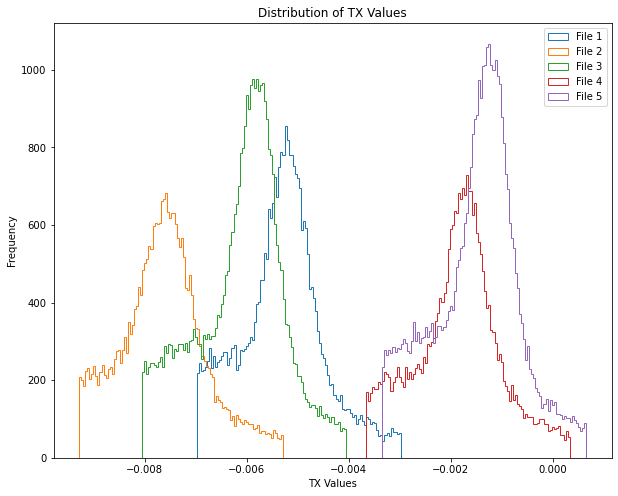

In [7]:
plt.figure(figsize=(10, 8))

for index, tx_values in enumerate(TX_values.values()):
    plt.hist(tx_values, bins=100, histtype='step', label=f'File {index + 1}')

plt.xlabel('TX Values')
plt.ylabel('Frequency')
plt.title('Distribution of TX Values')
plt.legend()
plt.show()

In [8]:
z4_directories = [
    '/eos/experiment/fasernu-data0/data/F222/zone4/candidates/vert32063_pl053_167_new',
    '/eos/experiment/fasernu-data0/data/F222/zone4/candidates/vert07261_pl248-362',
    '/eos/experiment/fasernu-data0/data/F222/zone4/candidates/vert10266_pl253-367'
]

pid_cut = 4
nseg_cut = 10

z4_TX_values = {}  # Dictionary to store TX values for each file
z4_TY_values = {}  # Dictionary to store TY values for each file
z4_X_values = {}
z4_Y_values = {}
z4_Z_values = {}

for directory in z4_directories:
    file_path = f"{directory}/**/linked_tracks.root"
    root_files = glob.glob(file_path, recursive=True)
    print("reading: ", root_files)
    if len(root_files) == 0:
        print(f"No ROOT file found in directory: {directory}")
        continue

    for root_file in root_files:
        f = uproot.open(root_file)
        emu_mc = f['tracks'].arrays(['nseg',
                                     's.ePID',
                                     's.eX',
                                     's.eY',
                                     's.eZ',
                                     's.eTX',
                                     's.eTY',
                                     's.eChi2'], library='ak')

        emu_muon_cuts = ak.where((emu_mc['s.ePID'][:, 0] <= pid_cut) & (emu_mc['nseg'] >= nseg_cut))
        selected_events = emu_mc[emu_muon_cuts]

        nseg_cut_c = 10
        TX = (selected_events['s.eX'][:, nseg_cut_c-1] - selected_events['s.eX'][:, 0]) / (selected_events['s.eZ'][:, nseg_cut_c-1] - selected_events['s.eZ'][:, 0])
        TY = (selected_events['s.eY'][:, nseg_cut_c-1] - selected_events['s.eY'][:, 0]) / (selected_events['s.eZ'][:, nseg_cut_c-1] - selected_events['s.eZ'][:, 0])
        X = selected_events['s.eX'][:, nseg_cut-1]
        Y = selected_events['s.eY'][:, nseg_cut-1]
        Z = selected_events['s.eZ'][:, nseg_cut-1]
        
        print(len(TX))
        # Compute mean and standard deviation for TX and TY
        TX_mean = np.mean(TX)
#         TX_std = np.std(TX)
        TY_mean = np.mean(TY)
#         TY_std = np.std(TY)

        # Apply 3 sigma cut for TX and TY
        TX_3sigma_mask = (TX >= TX_mean - 0.002) & (TX <= TX_mean + 0.002)
        TY_3sigma_mask = (TY >= TY_mean - 0.002) & (TY <= TY_mean + 0.002)

        # Combine masks for both TX and TY
        combined_mask = TX_3sigma_mask & TY_3sigma_mask

        # Apply the combined mask to filter the events
        TX_filtered = TX[combined_mask]
        TY_filtered = TY[combined_mask]
        X_filtered = X[combined_mask]/1e3 + 121
        Y_filtered = Y[combined_mask]/1e3 + 92
        Z_filtered = Z[combined_mask]/1e3
        print(len(TX_filtered))
        
        # Store TX and TY values in the dictionary with file name as key
        z4_TX_values[root_file] = TX_filtered
        z4_TY_values[root_file] = TY_filtered
        z4_X_values[root_file] = X_filtered
        z4_Y_values[root_file] = Y_filtered
        z4_Z_values[root_file] = Z_filtered
        

reading:  ['/eos/experiment/fasernu-data0/data/F222/zone4/candidates/vert32063_pl053_167_new/reco32_065000_050000/v15/linked_tracks.root']
181237
48848
reading:  ['/eos/experiment/fasernu-data0/data/F222/zone4/candidates/vert07261_pl248-362/reco07_095000_005000/v35/linked_tracks.root']
111450
28896
reading:  ['/eos/experiment/fasernu-data0/data/F222/zone4/candidates/vert10266_pl253-367/reco10_005000_020000/v35/linked_tracks.root']
128865
34946


In [9]:
# Initialize empty arrays for aggregation
z4_all_TX = np.array([])
z4_all_TY = np.array([])
z4_all_X = np.array([])
z4_all_Y = np.array([])
z4_all_Z = np.array([])

# Aggregate TX_values
for tx in z4_TX_values.values():
    z4_all_TX = np.concatenate((z4_all_TX, tx))

# Aggregate TY_values
for ty in z4_TY_values.values():
    z4_all_TY = np.concatenate((z4_all_TY, ty))

# Aggregate X_values
for x in z4_X_values.values():
    z4_all_X = np.concatenate((z4_all_X, x))

# Aggregate Y_values
for y in z4_Y_values.values():
    z4_all_Y = np.concatenate((z4_all_Y, y))

# Aggregate Z_values
for z in z4_Z_values.values():
    z4_all_Z = np.concatenate((z4_all_Z, z))


In [10]:
len(z4_all_TX)

112690

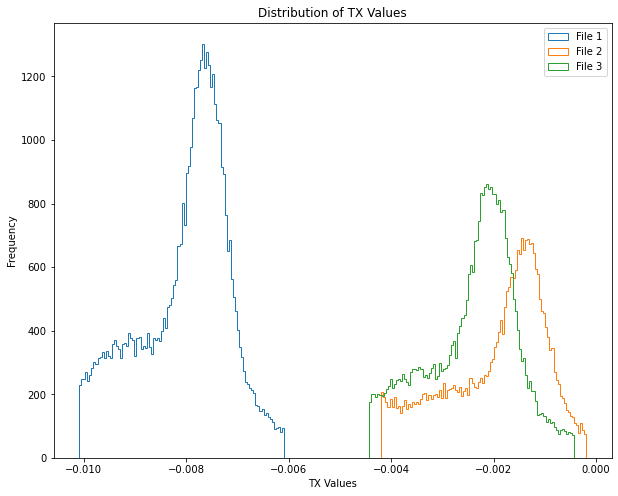

In [11]:
plt.figure(figsize=(10, 8))

for index, tx_values in enumerate(z4_TX_values.values()):
    plt.hist(tx_values, bins=100, histtype='step', label=f'File {index + 1}')

plt.xlabel('TX Values')
plt.ylabel('Frequency')
plt.title('Distribution of TX Values')
plt.legend()
plt.show()

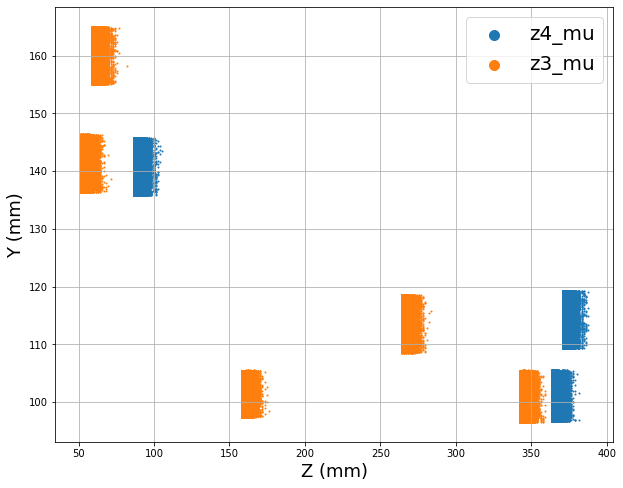

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(z4_all_Z , z4_all_Y , s=1, label='z4_mu')
plt.scatter(z3_all_Z , z3_all_Y , s=1, label='z3_mu')
plt.xlabel('Z (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.grid(True)
plt.legend(fontsize=20, markerscale=10)
plt.show()

In [12]:
## aligned spectrometer data
f_track = uproot.open('/eos/home-a/agarabag/new_ift_algnm/run/ift_emu_runs1_v3/kfalignment_data.root')
ift = f_track['trackParam'].arrays(['evtTime',
                      'VetoNu0_raw_charge',
                      'VetoNu1_raw_charge',
                      'Calo0_raw_charge',
                      'Calo1_raw_charge',
                      'Calo2_raw_charge',
                      'Calo3_raw_charge',
                      'Preshower0_raw_charge',
                      'Preshower1_raw_charge',
                      'VetoSt20_raw_charge',
                      'VetoSt21_raw_charge',
                      'fitParam_x',
                      'fitParam_y',
                      'fitParam_z',
                      'fitParam_px',
                      'fitParam_py',
                      'fitParam_pz',
                      'fitParam_chi2',
                      'fitParam_nMeasurements',
                      'fitParam_align_id'], library='ak')

In [14]:
tx = ift.fitParam_px/ift.fitParam_pz
ty = ift.fitParam_py/ift.fitParam_pz

In [15]:
att = ak.num(ift['fitParam_align_id'])
att

<Array [24, 19, 24, 24, 24, ... 20, 24, 24, 24] type='2965138 * int64'>

In [16]:
ift_filter = ak.where((np.sqrt(ift['fitParam_x']**2 + ift['fitParam_y']**2) <= 100)
                      & (ift['fitParam_chi2'] < 30) 
                      & (ak.num(ift['fitParam_align_id']) == 24)
                      & (np.sqrt(ift.fitParam_px**2 + ift.fitParam_py**2 + ift.fitParam_pz**2) > 200)
#                       & (abs(tx) < 0.005)
#                       & (abs(ty) < 0.005)
#                       & (np.arctan(np.sqrt(tx**2 + ty**2)) <= 0.46)
#                       & (np.arctan(np.sqrt(tx**2 + ty**2)) >= 0.005)
                      & (ift.VetoNu0_raw_charge>40)
                      & (ift.VetoNu1_raw_charge>40)
                      & (ift.VetoSt20_raw_charge > 40)
                      & (ift.VetoSt21_raw_charge > 40)
                      & (ift.Preshower0_raw_charge > 2.5)
                      & (ift.Preshower1_raw_charge > 2.5)
                      & (ift.Calo0_raw_charge > 0.1)
                      & (ift.Calo1_raw_charge > 0.1)
                      & (ift.Calo2_raw_charge > 0.1)
                      & (ift.Calo3_raw_charge > 0.1))

In [15]:
len(ift[ift_filter])

62877

In [16]:
# Apply cuts
cut1 = np.sqrt(ift['fitParam_x']**2 + ift['fitParam_y']**2) <= 100
cut2 = ift['fitParam_chi2'] < 100
cut3 = ak.num(ift['fitParam_align_id']) > 17
cut4 = np.sqrt(ift['fitParam_px']**2 + ift['fitParam_py']**2 + ift['fitParam_pz']**2) > 200
# cut5 = np.arctan(np.sqrt(tx**2 + ty**2)) <= 0.46
# cut6 = np.arctan(np.sqrt(tx**2 + ty**2)) >= 0.005
cut7 = ift['VetoSt20_raw_charge'] > 40
cut8 = ift['VetoSt21_raw_charge'] > 40
cut9 = ift['Preshower0_raw_charge'] > 2.5
cut10 = ift['Preshower1_raw_charge'] > 2.5
cut11 = ift['Calo0_raw_charge'] > 0.1
cut12 = ift['Calo1_raw_charge'] > 0.1
cut13 = ift['Calo2_raw_charge'] > 0.1
cut14 = ift['Calo3_raw_charge'] > 0.1
cut5 = abs(tx) < 0.005
cut6 = abs(ty) < 0.005


# Print the number of events after each cut
print(f"Initial events: {len(ift)}")
print(f"r <= 100 mm: {np.sum(cut1)}")
print(f"Chi < 100: {np.sum(cut1 & cut2)}")
print(f"num cluster hits > 17: {np.sum(cut1 & cut2 & cut3)}")
print(f"P > 200 GeV: {np.sum(cut1 & cut2 & cut3 & cut4)}")
print(f"abs(Tx) < 0.005: {np.sum(cut1 & cut2 & cut3 & cut4 & cu5)}")
print(f"abs(Ty) < 0.005: {np.sum(cut1 & cut2 & cut3 & cut4 & cu6)}")
# print(f"Theta <= 0.46 rad: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5)}")
# print(f"Theta >= 0.005 rad: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6)}")
print(f"VetoSt20_raw_charge > 40pC: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7)}")
print(f"VetoSt21_raw_charge > 40pC: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8)}")
print(f"Preshower0_raw_charge > 2.5: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9)}")
print(f"Preshower1_raw_charge > 2.5: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10)}")
print(f"Calo0_raw_charge > 0.1: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10 & cut11)}")
print(f"Calo1_raw_charge > 0.1: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10 & cut11 & cut12)}")
print(f"Calo2_raw_charge > 0.1: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10 & cut11 & cut12 & cut13)}")
print(f"Calo3_raw_charge > 0.1: {np.sum(cut1 & cut2 & cut3 & cut4 & cut5 & cut6 & cut7 & cut8 & cut9 & cut10 & cut11 & cut12 & cut13 & cut14)}")

Initial events: 2965138
r <= 100 mm: 2564201
Chi < 100: 2462452
num cluster hits > 17: 2382126
P > 200 GeV: 1668261


NameError: name 'cu5' is not defined

In [17]:
len(ift.VetoNu0_raw_charge[ift.VetoNu0_raw_charge<40])

15733

62877


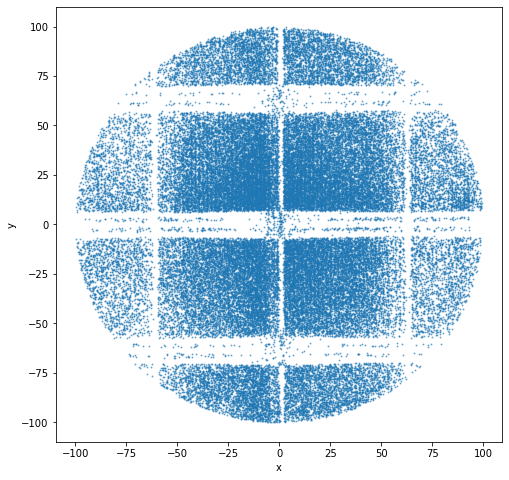

In [18]:
plt.figure(figsize=(8, 8))
print(len(ift['fitParam_x'][ift_filter]))
plt.scatter(ift['fitParam_x'][ift_filter], ift['fitParam_y'][ift_filter], s=1, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(-121, 121)
# plt.ylim(-121, 121)
plt.show()

In [62]:
grid_cell_size = 10  # mm
x_min, x_max = -100, 100  # x-axis range
y_min, y_max = -100, 100  # y-axis range

# Calculate the number of grid cells in x and y directions
n_cells_x = int((x_max - x_min) / grid_cell_size)
n_cells_y = int((y_max - y_min) / grid_cell_size)

track_density_grid = np.zeros((n_cells_x, n_cells_y))

for x, y in zip(ift['fitParam_x'][ift_filter], ift['fitParam_y'][ift_filter]):
    # Calculate the cell indices for the current track's position
    cell_x = int((x - x_min) / grid_cell_size)
    cell_y = int((y - y_min) / grid_cell_size)
    
    # Increment the corresponding cell in the density grid
    track_density_grid[cell_x, cell_y] += 1
    
total_tracks_before_cuts = len(ift)
track_density_grid /= total_tracks_before_cuts

for i in range(n_cells_x):
    for j in range(n_cells_y):
        cell_x = i * grid_cell_size + x_min
        cell_y = j * grid_cell_size + y_min
        density = track_density_grid[i, j]
        
#         print(f"Grid cell ({cell_x} mm, {cell_y} mm): Track density = {density}")

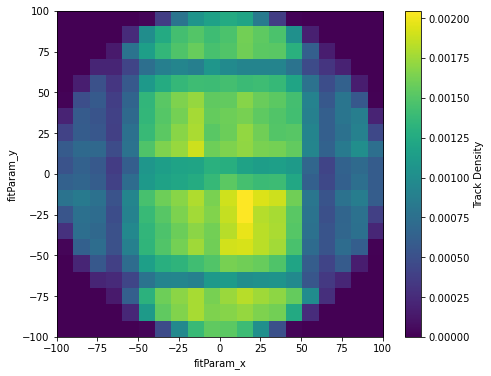

In [63]:
plt.figure(figsize=(8, 6))

# Plot the heatmap
plt.imshow(track_density_grid.T, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap='viridis')
plt.colorbar(label='Track Density')

# Set plot limits and labels
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('fitParam_x')
plt.ylabel('fitParam_y')

plt.show()

In [19]:
z3_cuts = ak.where((np.sqrt((z3_all_X-(125+10))**2 + (z3_all_Y-171)**2) <= 100))
z4_cuts = ak.where(np.sqrt((z4_all_X-(125+10))**2 + (z4_all_Y-171)**2) <= 100)

In [20]:
len(z4_all_X), len(z4_all_TX)

(112690, 112690)

62877
92468 86108


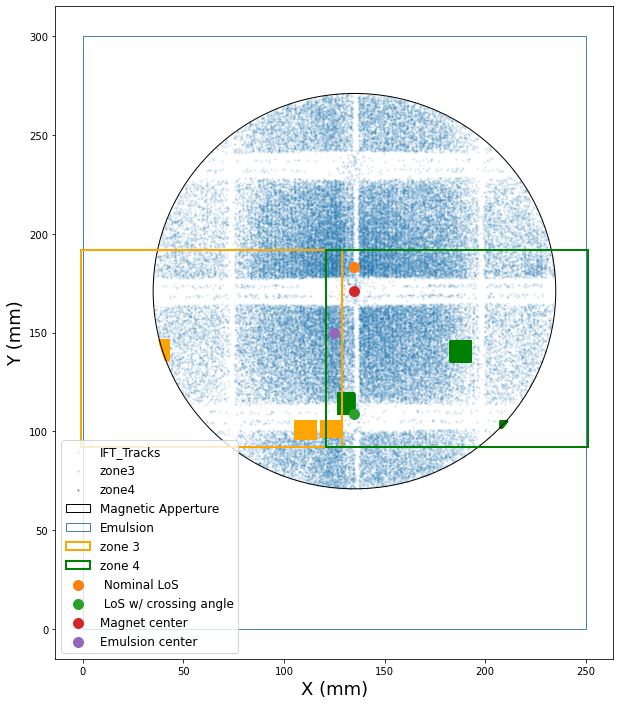

In [21]:
plt.figure(figsize=(10, 12))
print(len(ift['fitParam_x'][ift_filter]))
plt.scatter(ift['fitParam_x'][ift_filter]+125+10, ift['fitParam_y'][ift_filter]+171, s=2, alpha=0.1, label='IFT_Tracks')
# plt.scatter(z3_all_X, z3_all_Y, label='zone3', s=2, alpha=0.4, color='orange')
# plt.scatter(z4_all_X, z4_all_Y, label='zone4', s=2, alpha=0.4, color='green')

plt.scatter(z3_all_X[z3_cuts], z3_all_Y[z3_cuts], label='zone3', s=2, alpha=0.4, color='orange')
plt.scatter(z4_all_X[z4_cuts], z4_all_Y[z4_cuts], label='zone4', s=2, alpha=0.4, color='green')
print(len(z3_all_X[z3_cuts]), len(z4_all_X[z4_cuts]))
# print(emu.x_pred, emu.y_pred, emu.id)

from matplotlib.patches import Rectangle, Circle

circle = Circle((125+10, 171), 100, edgecolor='black', facecolor='none', label='Magnetic Apperture')
plt.gca().add_patch(circle)

rect = Rectangle((0, 0), 250, 300, edgecolor='steelblue', facecolor='none', label='Emulsion')
plt.gca().add_patch(rect)

rect = Rectangle((-1, 92), 130, 100, edgecolor='orange', facecolor='none', label='zone 3', linewidth=2)
plt.gca().add_patch(rect)

rect = Rectangle((121, 92), 130, 100, edgecolor='green', facecolor='none', label='zone 4', linewidth=2)
plt.gca().add_patch(rect)

plt.scatter(125+10, 183, s=100, label=' Nominal LoS')
plt.scatter(125+10, 109, s=100, label=' LoS w/ crossing angle')
plt.scatter(125+10, 171, s=100, label='Magnet center')
plt.scatter(125, 150, s=100, label='Emulsion center')



plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.legend(fontsize=12, loc='lower left')
plt.show()


In [22]:
# distance from IFT to closest emulsion plate [mm]
DistEmuIft = 555.84

# Z position of module 0 and 2, which is smallest z position in IFT 1st layer
module0_z = -1898.05 + 3000 # mm

# Z position of module 4 and 6, which is largest z position in IFT 1st layer
# module4_z = -1885.25 # mm
module4_z = -1885.25 + 3000 # mm (in emulsion system)


# Emulsion to IFT Extrapolation
# Step 1: Emulsion to IFT module 4
def emu2ift(x, y, z, tx, ty):
#     Dist_tot = DistEmuIft + np.abs(module0_z - module4_z)
    Dist_tot = np.abs(z - module0_z)
    print("DDD: ", Dist_tot)
    x_pred = Dist_tot * tx + x
    y_pred = Dist_tot * ty + y
    return x_pred, y_pred

combined_trans_emu_x = ak.to_numpy(np.concatenate((z4_all_X[z4_cuts], z3_all_X[z3_cuts])))
combined_trans_emu_y = ak.to_numpy(np.concatenate((z4_all_Y[z4_cuts], z3_all_Y[z3_cuts])))
combined_z = ak.to_numpy(np.concatenate((z4_all_Z[z4_cuts], z3_all_Z[z3_cuts])))
combined_tx = ak.to_numpy(np.concatenate((z4_all_TX[z4_cuts], z3_all_TX[z3_cuts])))
combined_ty = ak.to_numpy(np.concatenate((z4_all_TY[z4_cuts], z3_all_TY[z3_cuts])))

emu_x_pred, emu_y_pred = emu2ift(combined_trans_emu_x, combined_trans_emu_y, combined_z, 
                                 combined_tx, combined_ty)

def ift2ift(x, y, z, tx, ty):
#     z=-1886.14
    Dist_tot = np.abs(z - module0_z)
    x_pred = Dist_tot * tx + x
    y_pred = Dist_tot * ty + y
    return x_pred, y_pred

iftx = ift['fitParam_x'][ift_filter]+125+10
ifty = ift['fitParam_y'][ift_filter]+171
ifttx = tx[ift_filter]
iftty = ty[ift_filter]
ift_x_pred, ift_y_pred = ift2ift(iftx, ifty, ift.fitParam_z[ift_filter]+3000, ifttx, iftty)


DDD:  [1012.14839478 1014.90300293 1014.90300293 ...  757.83800049  757.83800049
  755.14299316]


In [23]:
emu = pd.DataFrame({
    'x_pred': emu_x_pred,
    'y_pred': emu_y_pred,
    'tx': combined_tx,
    'ty': combined_ty,
#     'id': all_id
})
emu

,x_pred,y_pred,tx,ty
0,173.921520,139.885029,-0.008820,0.003650
1,175.809268,142.235577,-0.007255,0.005995
2,173.828538,141.558827,-0.009538,0.004174
3,173.588616,140.204614,-0.009809,0.002980
4,179.320130,139.562711,-0.007347,0.002665
...,...,...,...,...
178571,109.343581,108.392462,-0.001685,0.005083
178572,109.301971,106.779447,-0.001545,0.004173
178573,111.339157,108.114382,-0.001001,0.006260
178574,113.418568,108.115425,0.000384,0.006195


In [24]:
type(emu.x_pred)

pandas.core.series.Series

In [44]:
type(ak.to_numpy(combined_trans_emu_x))

numpy.ndarray

In [43]:
emu.x_pred - combined_trans_emu_x

0       -9.539070
1       -7.160497
2       -8.343560
3       -9.688614
4       -8.881891
           ...   
58414   -1.123915
58415   -1.108840
58416   -1.016641
58417   -0.655917
58418   -1.029867
Name: x_pred, Length: 58419, dtype: float64

In [27]:

# Assuming you have the following arrays: combined_x, combined_y, emu_x_pred, emu_y_pred

# Calculate the residuals
residuals_x = combined_trans_emu_x - emu.x_pred 
residuals_y = combined_trans_emu_y - emu.y_pred 

# Create the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(combined_trans_emu_x , combined_trans_emu_y , s=200, label='original')
plt.scatter(emu.x_pred , emu.y_pred, s=200, marker='^', label='extrapolated')

#Add the residuals text near each point
for x, y, res_x, res_y in zip(combined_trans_emu_x, combined_trans_emu_y, residuals_x, residuals_y):
    if res_y < 0:
        plt.text(x, y-3, f"({res_x:.4f}, {res_y:.4f})", fontsize=12, ha='center', va='bottom')
    else:
        plt.text(x, y+3, f"({res_x:.4f}, {res_y:.4f})", fontsize=12, ha='center')


plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

KeyboardInterrupt: 

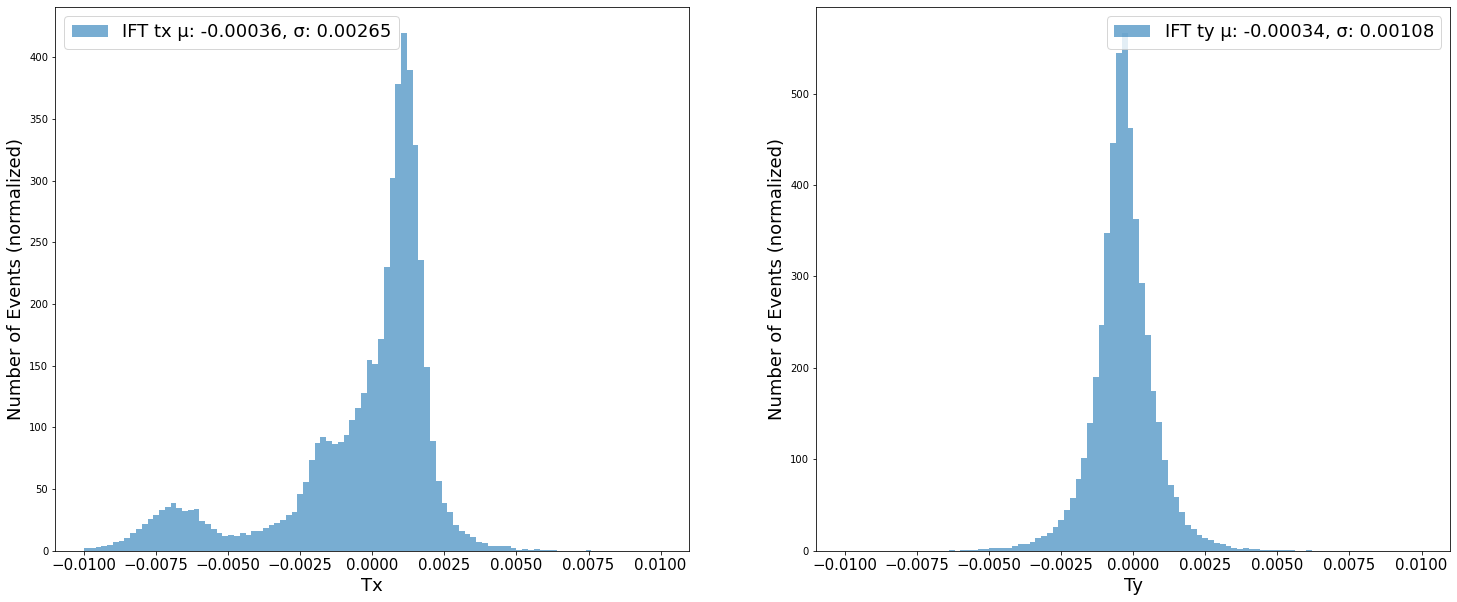

In [25]:
# tx
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
bin = np.linspace(-0.01, 0.01, 101)
round_num = 5

# emutx_mean, emutx_std = round(np.mean(emu['tx']), round_num), round(np.std(emu['tx']), round_num)
# plt.hist(emu['tx'], bins=bin, alpha=.6, density=True, label=f'Emu tx µ: {emutx_mean}, σ: {emutx_std}')

ifttx_mean, ifttx_std = round(np.mean(ifttx), round_num), round(np.std(ifttx), round_num)
plt.hist(ifttx, bins=bin, alpha=.6, density=True, label=f'IFT tx µ: {ifttx_mean}, σ: {ifttx_std}')

plt.xlabel('Tx', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.xticks(fontsize=15)
plt.legend(fontsize=18)

# ty
plt.subplot(1, 2, 2)
bin = np.linspace(-0.01, 0.01, 101)
# emuty_mean, emuty_std = round(np.mean(emu['ty']), round_num), round(np.std(emu['ty']), round_num)
# plt.hist(emu['ty'], bins=bin, alpha=.6, density=True, label=f'Emu ty µ: {emuty_mean}, σ: {emuty_std}')

iftty_mean, iftty_std = round(np.mean(iftty), round_num), round(np.std(iftty), round_num)
plt.hist(iftty, bins=bin, alpha=.6, density=True, label=f'IFT ty µ: {iftty_mean}, σ: {iftty_std}')

plt.xlabel('Ty', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.xticks(fontsize=15)
plt.legend(fontsize=18)
plt.show()

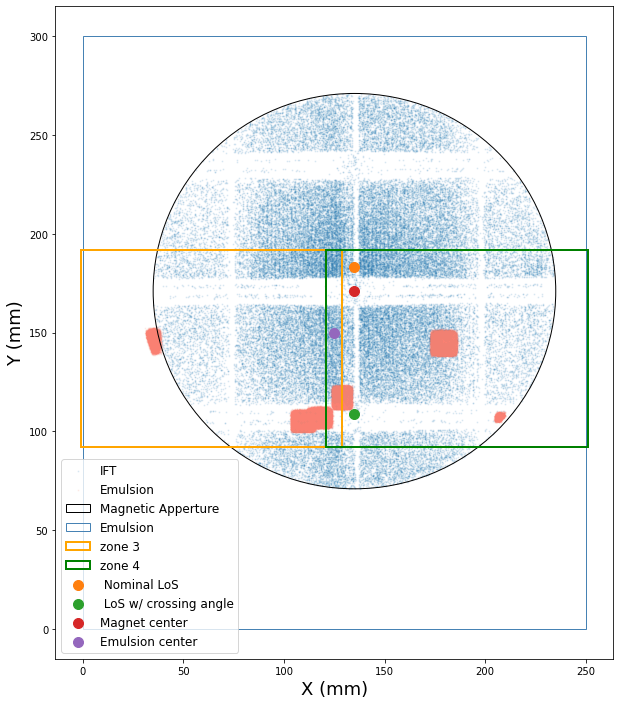

In [26]:
plt.figure(figsize=(10, 12))

plt.scatter(ift_x_pred, ift_y_pred, s=1, alpha=0.1, label='IFT')
plt.scatter(emu.x_pred, emu.y_pred, s=1, alpha=0.1, label='Emulsion', color='salmon')
# print(emu.x_pred, emu.y_pred, emu.id, combined_z/1e3)
from matplotlib.patches import Rectangle, Circle

circle = Circle((125+10, 171), 100, edgecolor='black', facecolor='none', label='Magnetic Apperture')
plt.gca().add_patch(circle)

rect = Rectangle((0, 0), 250, 300, edgecolor='steelblue', facecolor='none', label='Emulsion')
plt.gca().add_patch(rect)

rect = Rectangle((-1, 92), 130, 100, edgecolor='orange', facecolor='none', label='zone 3', linewidth=2)
plt.gca().add_patch(rect)

rect = Rectangle((121, 92), 130, 100, edgecolor='green', facecolor='none', label='zone 4', linewidth=2)
plt.gca().add_patch(rect)

plt.scatter(125+10, 183, s=100, label=' Nominal LoS')
plt.scatter(125+10, 109, s=100, label=' LoS w/ crossing angle')
plt.scatter(125+10, 171, s=100, label='Magnet center')
plt.scatter(125, 150, s=100, label='Emulsion center')



plt.xlabel('X (mm)', fontsize=18)
plt.ylabel('Y (mm)', fontsize=18)
plt.legend(fontsize=12, loc='lower left')
plt.show()


In [27]:
# x_res, y_res, tx_res, ty_res = 1.7211, 0.1811, 0.01406, 0.00295 # obtain these from truth match residual
# x_res, y_res, tx_res, ty_res = 0.6, 0.028, 0.000474, 0.000254
x_res, y_res, tx_res, ty_res = 0.9, 0.9, 0.05, 0.05

search_scale = 5
Chi2 = []
resx, resy, restx, resty = [], [], [], []
# emu_id = []

for i in range(len(ift_x_pred)):
    # Select a box for each track
    emu_filter = emu[(emu.x_pred > ift_x_pred[i]-search_scale*x_res/2) & (emu.x_pred < ift_x_pred[i]+search_scale*x_res/2) & (emu.y_pred > ift_y_pred[i]-search_scale*y_res/2) & (emu.y_pred < ift_y_pred[i]+search_scale*y_res/2)]
#     emu_filter = emu[(emu.x_pred > ift_x_pred[i]-search_scale) 
#                      & (emu.x_pred < ift_x_pred[i]+search_scale) 
#                      & (emu.y_pred > ift_y_pred[i]-search_scale) 
#                      & (emu.y_pred < ift_y_pred[i]+search_scale)]

#     # Matching Chi2
    chi2 = np.sqrt((ift_x_pred[i]-emu_filter.x_pred)**2/(x_res)**2 + 
                   (ift_y_pred[i]-emu_filter.y_pred)**2/(y_res)**2 + 
                   (ifttx[i]-emu_filter.tx)**2/(tx_res)**2 + 
                   (iftty[i]-emu_filter.ty)**2/(ty_res)**2)
#     chi2 = np.sqrt((ift_x_pred[i]-emu_filter.x_pred)**2/(x_res)**2 + 
#                    (ift_y_pred[i]-emu_filter.y_pred)**2/(y_res)**2)

#     if (len(emu_filter)>0 and len(chi2)>0): print("chi2: ", chi2)
    if np.min(chi2) < 50:
        min_num = np.where(chi2==np.min(chi2))[0][0]
        resx.append(ift_x_pred[i] - emu_filter.x_pred.iloc[min_num])
        resy.append(ift_y_pred[i] - emu_filter.y_pred.iloc[min_num])
        restx.append(ifttx[i] - emu_filter.tx.iloc[min_num])
        resty.append(iftty[i] - emu_filter.ty.iloc[min_num])
#         emu_id.append(emu_filter.id.iloc[min_num])

print(resx, resy, restx, resty)
# print(emu_id)

[-0.22303591434553027, -4.962981743400519, -0.32566036028316603, 1.7616379694175492, -0.254420963262902, 0.5435901728463932, -0.003960633834964256, -0.017530430418275955, 0.0712914674569447, -1.8684855048483655, 0.18399707468506676, -4.148322145249338, -3.895758725079247, 0.017047881310247703, 2.3297232184975414, 2.6113265668094385, 0.06815104701361463, 1.2264595773097255, 0.21272705019138982, 0.013978917408309144, -2.9522627748098103, 3.902534109235063, 0.0008289399123384555, 0.004655972825787558, -3.566705082020178, 0.7515303315759922, -0.5664965699361915, 0.5527588916005044, -0.4444716579941854, 0.8723107494963642, 3.00142045944051, 4.105858058082795, -4.861487946133963, -0.4467701934446211, -1.685911079381924, 3.490046221294037, -0.0666145423201101, -2.960363835413588, -0.02613142710359284, 4.514089734874688, 0.9884391273054121, -2.3076772767714147, 0.0031219148095544824, -0.016911432771095747, -0.8102250579550656, 3.9382698872361743, 0.03280847331038217, -1.2772598912647766, -0.90

In [28]:
len(resx)


3423

3423


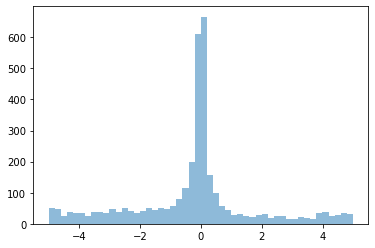

In [29]:
print(len(resx))
plt.hist(resx, bins=50, alpha=0.5)
plt.show()

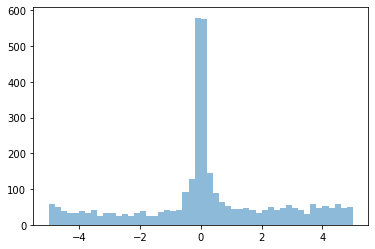

In [30]:
plt.hist(resy, bins=50,alpha=0.5)
plt.show()

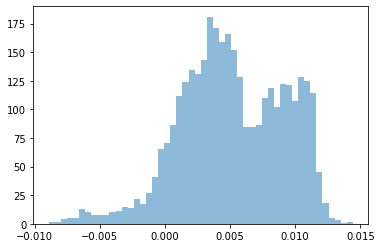

In [31]:
plt.hist(restx, bins=50, alpha=0.5)
plt.show()

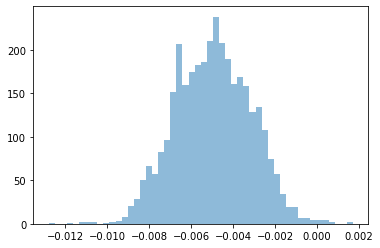

In [32]:
plt.hist(resty, bins=50, alpha=0.5)
plt.show()